In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#**Fetching the data**
---

In [2]:
def fetchData(linkToFile):
  return pd.read_csv(linkToFile)

In [3]:
dataset = fetchData("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv")

#**Looking at the data and its characteristics**
---

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


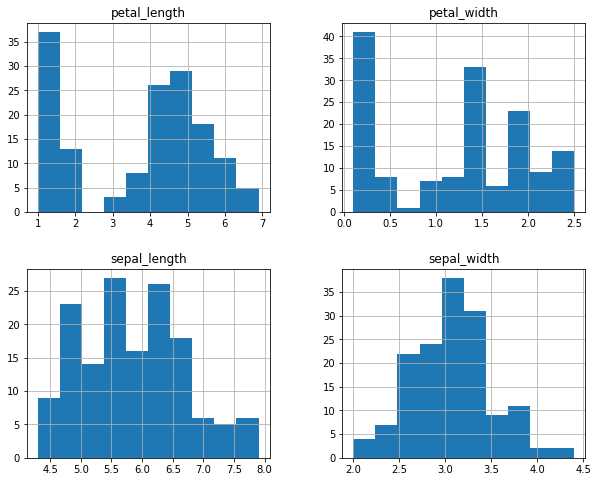

In [7]:
dataset.hist(figsize=(10,8))
plt.show()

In [8]:
dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d157a7ac8>,
      dtype=object)

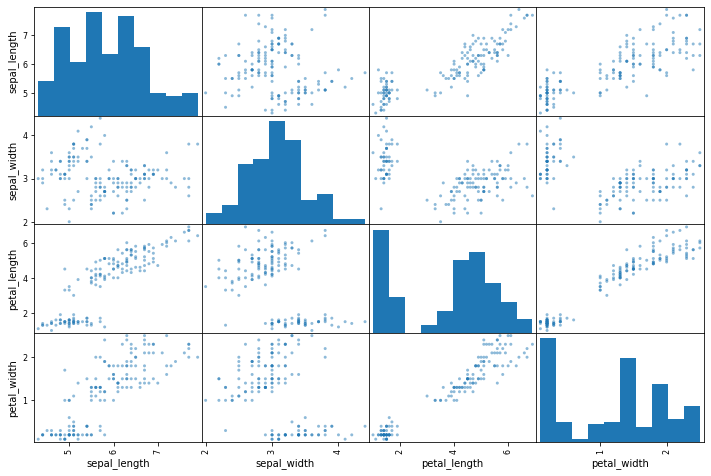

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset[list(dataset.columns)], figsize=(12, 8))

#**Decision Tree Classifier**
---

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [11]:
np_array = dataset.values
X = np_array[:,:4]
y = np_array[:,4]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [13]:
clf = clf.fit(X_train,y_train)

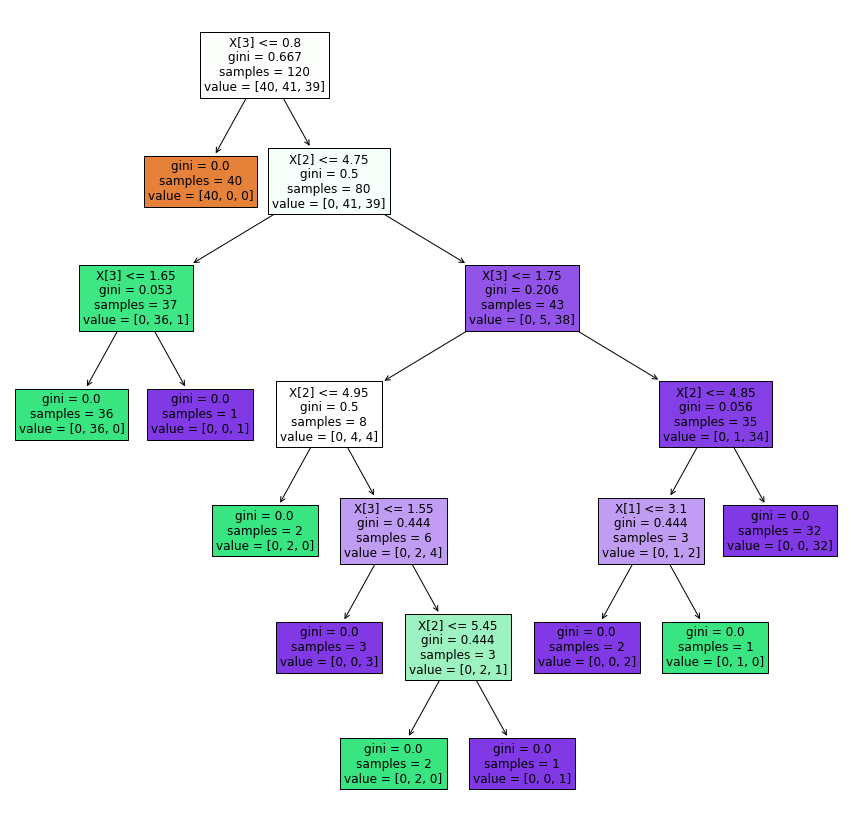

In [14]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(clf, filled=True, fontsize=12)
plt.show()

In [15]:
column_list = list(dataset.columns)

In [16]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=column_list[:4])

In [17]:
print(r)

|--- petal_width <= 0.80
|   |--- class: setosa
|--- petal_width >  0.80
|   |--- petal_length <= 4.75
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- petal_width >  1.65
|   |   |   |--- class: virginica
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- petal_length <= 4.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal_length >  4.95
|   |   |   |   |--- petal_width <= 1.55
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- petal_width >  1.55
|   |   |   |   |   |--- petal_length <= 5.45
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |--- petal_length >  5.45
|   |   |   |   |   |   |--- class: virginica
|   |   |--- petal_width >  1.75
|   |   |   |--- petal_length <= 4.85
|   |   |   |   |--- sepal_width <= 3.10
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- sepal_width >  3.10
|   |   |   |   |   |--- class: versicolor
|   |   |   |--- petal_length >  4.85

In [18]:
clf.predict(X_test, check_input=True)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [19]:
clf.score(X_test, y_test)

1.0